<a href="https://colab.research.google.com/github/glm97/Gender-Inequality/blob/master/projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [25]:
# from google.colab import files
# uploaded = files.upload()
# import io
# db = pd.read_csv(io.StringIO(uploaded['adult.csv'].decode('utf-8')))
# db.head()

db = pd.read_csv('adult.csv')
db.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Pré-processamento

## Removendo colunas com muitos dados faltantes/repetidos

In [26]:
db1 = db.drop(['capital.gain', 'capital.loss','native.country'], axis=1)
db1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K


## Transformando colunas em categóricas

In [27]:
db1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
hours.per.week     int64
income            object
dtype: object

In [28]:
db1['workclass'] = db1['workclass'].astype('category')
db1['education'] = db1['education'].astype('category')
db1['marital.status'] = db1['marital.status'].astype('category')
db1['occupation'] = db1['occupation'].astype('category')
db1['relationship'] = db1['relationship'].astype('category')
db1['race'] = db1['race'].astype('category')
db1['sex'] = db1['sex'].astype('category')
db1['income'] = db1['income'].astype('category')
db1.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
hours.per.week       int64
income            category
dtype: object

## Inserindo dados faltantes

In [29]:
db1['workclass'].cat.categories = ['Doesnt-work', 'Federal-gov', 'Local-gov', 
                                     'Never-worked', 'Private', 'Self-emp-inc', 
                                     'Self-emp-not-inc', 'State-gov', 'Without-pay']
db1['occupation'].cat.categories = ['Doesnt-work', 'Adm-clerical', 
                                      'Armed-Forces', 'Craft-repair', 
                                      'Exec-managerial', 'Farming-fishing',
                                      'Handlers-cleaners', 'Machine-op-inspct',
                                      'Other-service', 'Priv-house-serv', 
                                      'Prof-specialty', 'Protective-serv',
                                      'Sales', 'Tech-support', 'Transport-moving']
db1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,Doesnt-work,77053,HS-grad,9,Widowed,Doesnt-work,Not-in-family,White,Female,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,Doesnt-work,186061,Some-college,10,Widowed,Doesnt-work,Unmarried,Black,Female,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K


## Transformando dados categóricos em númericos

In [30]:
db1['workclass'] = db1['workclass'].cat.codes
db1['education'] = db1['education'].cat.codes
db1['marital.status'] = db1['marital.status'].cat.codes
db1['occupation'] = db1['occupation'].cat.codes
db1['relationship'] = db1['relationship'].cat.codes
db1['race'] = db1['race'].cat.codes
db1['sex'] = db1['sex'].cat.codes
db1['income'] = db1['income'].cat.codes
db1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,0,77053,11,9,6,0,1,4,0,40,0
1,82,4,132870,11,9,6,4,1,4,0,18,0
2,66,0,186061,15,10,6,0,4,2,0,40,0
3,54,4,140359,5,4,0,7,4,4,0,40,0
4,41,4,264663,15,10,5,10,3,4,0,40,0


##Normalização

In [31]:
db_norm = (db1 - db1.min()) / (db1.max() - db1.min())
db_norm.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,1.000000,0.0,0.043987,0.733333,0.533333,1.000000,0.000000,0.2,1.0,0.0,0.397959,0.0
1,0.890411,0.5,0.081896,0.733333,0.533333,1.000000,0.285714,0.2,1.0,0.0,0.173469,0.0
2,0.671233,0.0,0.118021,1.000000,0.600000,1.000000,0.000000,0.8,0.5,0.0,0.397959,0.0
3,0.506849,0.5,0.086982,0.333333,0.200000,0.000000,0.500000,0.8,1.0,0.0,0.397959,0.0
4,0.328767,0.5,0.171404,1.000000,0.600000,0.833333,0.714286,0.6,1.0,0.0,0.397959,0.0


# Classificação

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

X_db = db_norm.drop('sex', axis=1)
y_db = db_norm.iloc[:, -3].values

#realizando feature selection para diminuir o overfitting
X_new = SelectKBest(chi2, k=7).fit_transform(X_db, y_db)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_db, test_size=1/4,
                                                random_state=42)

## Multinomial Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
grid_param = {'alpha' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
multiNB = MultinomialNB()
clf = GridSearchCV(estimator=multiNB,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
clf.fit(X_train, y_train)

In [241]:
best_parameters = clf.best_params_  
print(best_parameters) 

{'alpha': 0.0}


In [0]:
mNB_model = MultinomialNB(0.0)
mNB_model.fit(X_train, y_train)
y_pred = mNB_model.predict(X_test)
y_pred_train = mNB_model.predict(X_train)

### Avaliação

Como esse modelo é bem simples, ele foi o que teve menor diferença entre a acurácia do conjunto de treino e do conjunto de teste.

In [249]:
from sklearn.metrics import accuracy_score
print("training accuracy:" + str(accuracy_score(y_train, y_pred_train)))
print("test accuracy:" + str(accuracy_score(y_test, y_pred)))

training accuracy:0.7452497952497953
test accuracy:0.746222822749048


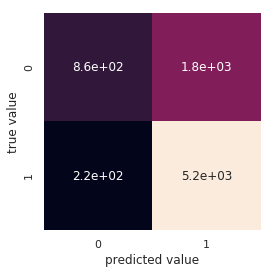

In [250]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
gausNB = GaussianNB()
gausNB.fit(X_train, y_train)
y_pred = gausNB.predict(X_test)
y_pred_train = gausNB.predict(X_train)

### Avaliação

In [252]:
print("training accuracy:" + str(accuracy_score(y_train, y_pred_train)))
print("test accuracy:" + str(accuracy_score(y_test, y_pred)))

training accuracy:0.7703112203112203
test accuracy:0.7685787986733816


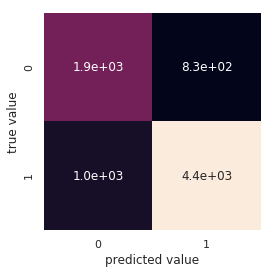

In [254]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_db, y_db, test_size=1/4,
                                                random_state=42)
rf_clf = RandomForestClassifier()
grid_param = {'n_estimators': [10, 100, 1000], 'max_depth': [2, 5, 10, None]}
clf = GridSearchCV(estimator=rf_clf,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
clf.fit(X_train, y_train)



In [256]:
best_parameters = clf.best_params_  
print(best_parameters) 

{'max_depth': 10, 'n_estimators': 100}


In [0]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

### Avaliação

Anteriormente a acurácia do conjunto de treino estava resultando em 87% e a acurácia do conjunto de teste estava em 75%. Para resolver esse problema de overfitting, incluí a seleção de feature antes de dividir os conjuntos de treino e teste e também busquei diminuir a complexidade do algoritmo de random forest deixando o tamanho máximo das árvores em 5, apesar do grid search indicar que o melhor tamanho encontrado foi 10.

In [262]:
print("training accuracy:" + str(accuracy_score(y_train, y_pred_train)))
print("test accuracy:" + str(accuracy_score(y_test, y_pred)))

training accuracy:0.8345618345618345
test accuracy:0.8265569340375876


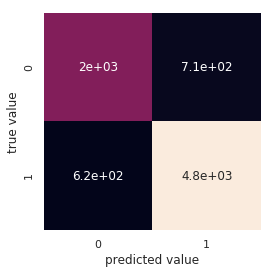

In [260]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## SVM

In [274]:
# db_norm.values
from sklearn import svm
grid_param = {'kernel':['linear', 'rbf', 'sigmoid'], 'C':[1, 10]}
svc_clf = svm.SVC(gamma="scale")
clf = GridSearchCV(estimator=svc_clf,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [265]:
best_parameters = clf.best_params_  
print(best_parameters)

{'C': 1, 'kernel': 'linear', 'max_iter': 100}


In [0]:
svc_model = svm.SVC(C=1.0, gamma='scale', kernel='linear')
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
y_pred_train = svc_model.predict(X_train)

### Avaliação

In [277]:
print("training accuracy:" + str(accuracy_score(y_train, y_pred_train)))
print("test accuracy:" + str(accuracy_score(y_test, y_pred)))

training accuracy:0.763063063063063
test accuracy:0.7603488514924457


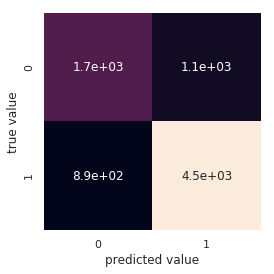

In [278]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Conclusão
Os algoritmos de Naive Bayes eram muito simples para essa base de dados, por isso tiveram um desempenho um pouco abaixo do Random Forest, o qual é um algoritmo um pouco mais complexo. Todavia, quando a complexidade do algoritmo aumentou, houve overfitting, o que pôde ser amenizado usando a seleção de features e simplificando um pouco o Random Forest. Em praticamente todos os modelos foi usado o grid search, o qual ajudou bastante na busca dos melhores hiper-parâmetros.